## Importing Libraries 

In [3]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"   
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"  
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Data Preprocessing 


In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical", 
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),  
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
    pad_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


I0000 00:00:1768119612.700615  116939 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5560 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


## Image Preprocessing 

In [10]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",  
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),  
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [11]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

## Building the Model 

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten


In [13]:
model = Sequential()


## Buliding the Convolutional Layer 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

model = Sequential()



In [15]:
# Block 1
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                 activation='relu', input_shape=[128, 128, 3]))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))



/root/tf-env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Block 2
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))



In [17]:
# Block 3
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))



In [18]:
# Block 4
model.add(Conv2D(filters=256, kernel_size=3, padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=3, padding='same',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.25))



In [19]:
# Flattening & Fully Connected Layers
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))  # Reduced from 1024
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=38, activation='softmax'))


## COMPILING THE MODEL 

In [20]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau  # ← Add this line!

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    
    ModelCheckpoint(
        'best_model.keras',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 9,586,758 (36.57 MB)

 Trainable params: 9,583,814 (36.56 MB)

 Non-trainable params: 2,944 (11.50 KB)

## TRAINING THE MODEL 

In [32]:
training_hist = model.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=25,
    callbacks=callbacks
)

Epoch 1/25
1856/2197 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - accuracy: 0.9982 - loss: 0.0061

KeyboardInterrupt: 

In [24]:
print(os.path.exists("best_model.keras"))

True


## MODEL EVALUATION 


In [26]:
train_loss, train_acc = model.evaluate(training_set)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_acc:.4f}")

val_loss, val_acc = model.evaluate(validation_set)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.9994 - loss: 0.0022
Training Loss: 0.0022
Training Accuracy: 0.9994
550/550 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step - accuracy: 0.9919 - loss: 0.0251
Validation Loss: 0.0251
Validation Accuracy: 0.9919


## SAVING THE MODEL 

In [29]:
model.save("Trained_Model.keras")

In [38]:
y_true = []
y_pred = []

for images, labels in validation_set:
    preds = model.predict(images, verbose=0)

    y_pred.extend(np.argmax(preds, axis=1))

    y_true.extend(np.argmax(labels.numpy(), axis=1))


In [40]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


[[502   1   0 ...   0   0   0]
 [  0 497   0 ...   0   0   0]
 [  0   0 438 ...   0   0   1]
 ...
 [  0   0   0 ... 489   0   0]
 [  0   0   0 ...   0 448   0]
 [  0   0   1 ...   0   0 479]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00       497
           2       0.99      1.00      0.99       440
           3       0.99      1.00      1.00       502
           4       1.00      1.00      1.00       454
           5       1.00      1.00      1.00       421
           6       1.00      1.00      1.00       456
           7       0.98      0.95      0.96       410
           8       1.00      1.00      1.00       477
           9       0.96      0.99      0.97       477
          10       1.00      1.00      1.00       465
          11       1.00      1.00      1.00       472
          12       1.00      1.00      1.00       480
          13       1.00      1.00      1.00       4

## VISUALIZATION 

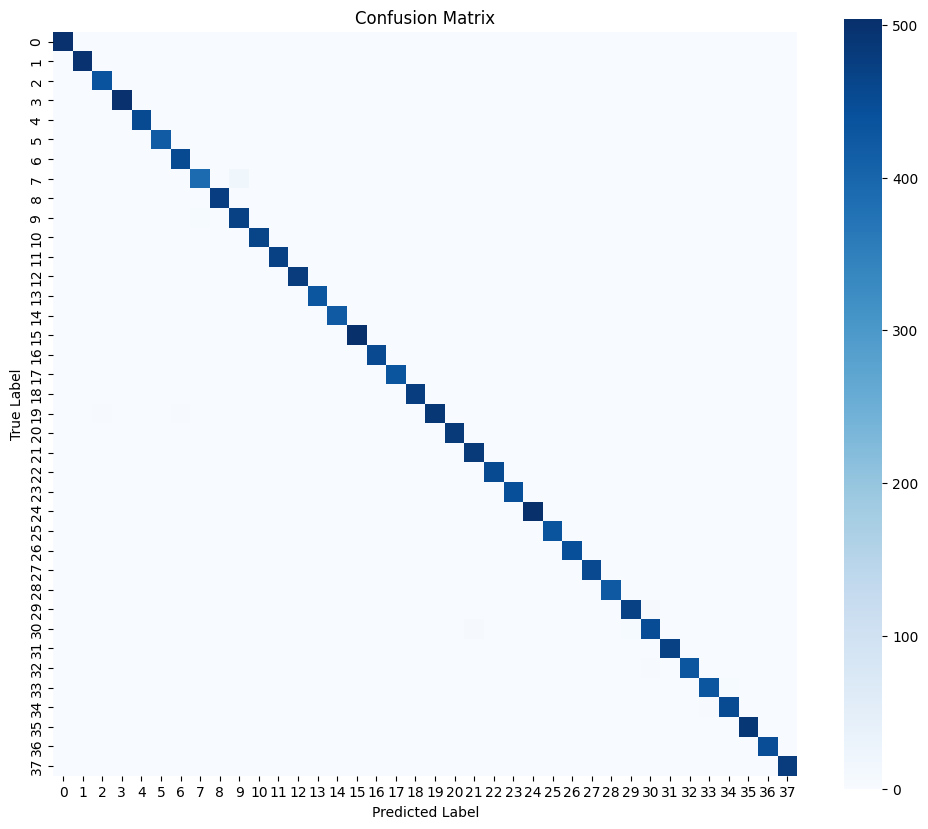

In [41]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=False,        # set True ONLY if classes are few
    cmap="Blues",
    square=True,
    cbar=True
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

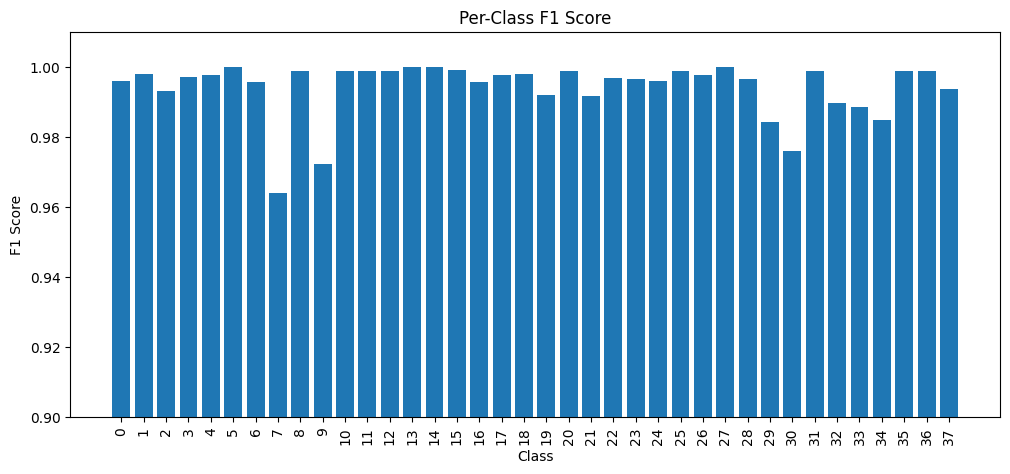

In [42]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

report = classification_report(y_true, y_pred, output_dict=True)
df = pd.DataFrame(report).T

df_classes = df.iloc[:-3]  

plt.figure(figsize=(12,5))
plt.bar(df_classes.index, df_classes['f1-score'])
plt.xlabel("Class")
plt.ylabel("F1 Score")
plt.title("Per-Class F1 Score")
plt.xticks(rotation=90)
plt.ylim(0.9, 1.01)
plt.show()


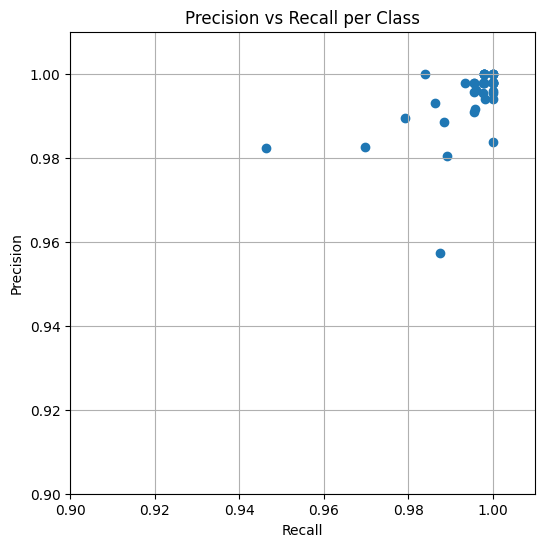

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(df_classes['recall'], df_classes['precision'])
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall per Class")
plt.xlim(0.9,1.01)
plt.ylim(0.9,1.01)
plt.grid(True)
plt.show()


## METRICS and PREDICTIONS 

In [22]:
from tensorflow.keras.models import load_model

model = load_model("best_model.keras")


In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",  
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),  
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [29]:
y_pred = model.predict(test_set)
print(y_pred.shape)


550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step
(17572, 38)


## SINGLE IMAGE TEST 

In [34]:
!pip uninstall opencv-python -y
!pip install opencv-python-headless


Found existing installation: opencv-python 4.12.0.88
Uninstalling opencv-python-4.12.0.88:
  Successfully uninstalled opencv-python-4.12.0.88
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 11.4 MB/s  0:00:04 eta 0:00:01


Exists: True


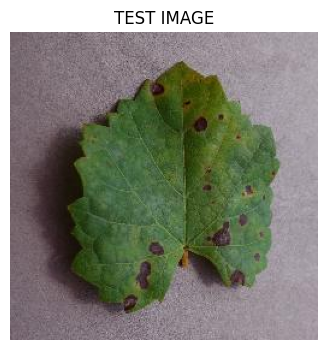

In [74]:
import os
import cv2
import matplotlib.pyplot as plt

image_path = "/mnt/d/Data Science/Plant disease/test/test/original.jpg"

print("Exists:", os.path.exists(image_path))

img = cv2.imread(image_path)

if img is None:
    print(" Image not found.")
    print("Check:")
    print("- File name case (Linux is case-sensitive)")
    print("- Exact extension (.JPG vs .jpg)")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.title("TEST IMAGE")
    plt.axis("off")
    plt.show()


In [75]:
import tensorflow as tf
import numpy as np

image = tf.keras.preprocessing.image.load_img(
    image_path,
    target_size=(128, 128)
)

input_arr = tf.keras.preprocessing.image.img_to_array(image)

print("After img_to_array:", input_arr.shape)  # (128, 128, 3)


input_arr = np.expand_dims(input_arr, axis=0)

print("Final input shape:", input_arr.shape)   # (1, 128, 128, 3)

prediction = model.predict(input_arr)

print("Prediction shape:", prediction.shape)


After img_to_array: (128, 128, 3)
Final input shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Prediction shape: (1, 38)


In [76]:
pred_index = np.argmax(prediction, axis=1)[0]
confidence = np.max(prediction) * 100

print("Predicted class index:", pred_index)
print(f"Confidence: {confidence:.2f}%")


Predicted class index: 11
Confidence: 99.43%


In [77]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "/mnt/d/Data Science/Plant Copy/train",   # 🔁 change if needed
    image_size=(128, 128),
    batch_size=32,
    shuffle=False
)

class_names = validation_set.class_names
print("Classes:", class_names)
print("Total classes:", len(class_names))


Found 70295 files belonging to 38 classes.
Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider

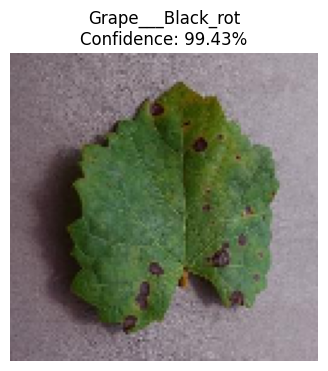

🦠 Predicted Disease: Grape___Black_rot


In [78]:
predicted_disease = class_names[pred_index]
plt.figure(figsize=(4,4))
plt.imshow(image)
plt.title(f"{predicted_disease}\nConfidence: {confidence:.2f}%")
plt.axis("off")
plt.show()
print("🦠 Predicted Disease:", predicted_disease)
